#Q6

['j45', 'j44']
['s24']


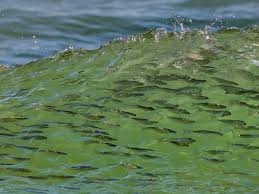

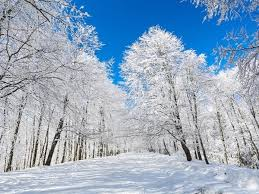

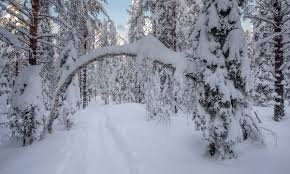

In [21]:
import os
import numpy as np
from skimage import io
from IPython.display import Image
import cv2
# Load the classifier
first_letter_of_sea = 's'
first_letter_of_forest = 'j'
num_of_sea = 40
num_of_forest = 40
# Load the images from the folder
folder_path = 'image/'
format = '.jpg'
image_files = os.listdir(folder_path)

num_of_sea_deteced_correctly = 0
num_of_forest_deteced_correctly = 0
num_of_forest_deteced_wrongly = 0
num_of_sea_deteced_wrongly = 0
sea_deteced_wrongly_name_file =[]
forest_deteced_wrongly_name_file =[]
y_pred=[]
y_test = []
# Classify each image
for file in image_files:
    image_path = os.path.join(folder_path, file)
    image = io.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blue_mean = np.mean(image[:,:,0])
    green_mean = np.mean(image[:,:,1])
    y_test.append(image_path.split(folder_path)[1].split(format)[0][0])
    if blue_mean > green_mean:
        y_pred.append(first_letter_of_sea)
        # print(image_path.split(folder_path)[1].split(format)[0] ," :This image is a Sea image.")
        if(image_path.split(folder_path)[1].split(format)[0][0]== first_letter_of_sea):
          ++num_of_sea_deteced_correctly
        else:
          ++num_of_forest_deteced_wrongly
          forest_deteced_wrongly_name_file.append(image_path.split(folder_path)[1].split(format)[0])
    else:
        y_pred.append(first_letter_of_forest)
        # print(image_path.split(folder_path)[1].split(format)[0] ," :This image is Forest image.")
        if(image_path.split(folder_path)[1].split(format)[0][0]== first_letter_of_forest):
          ++num_of_forest_deteced_correctly
        else:
          ++num_of_sea_deteced_wrongly
          sea_deteced_wrongly_name_file.append(image_path.split(folder_path)[1].split(format)[0])
print(forest_deteced_wrongly_name_file)
print(sea_deteced_wrongly_name_file)

for i in sea_deteced_wrongly_name_file:
  display(Image(filename=folder_path+i+format))
for i in forest_deteced_wrongly_name_file:
  display(Image(filename=folder_path+i+format))


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score
print(confusion_matrix(y_test, y_pred))
print("accuracy_score = ",accuracy_score(y_test, y_pred))
print("precision_score = ",precision_score(y_test, y_pred, pos_label='s'))
print( "recall_score = ",recall_score(y_test, y_pred, pos_label='s'))

[[40  2]
 [ 1 39]]
accuracy_score =  0.9634146341463414
precision_score =  0.9512195121951219
recall_score =  0.975
